In [15]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.use('GTKAgg')
#import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('C:/Users/User/Downloads/boston_house_prices.csv')
prices = data['MEDV']
features = data.drop('MEDV',axis=1)
#data['MEDV'==50.0]

# Success
print ('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))
print(data)

Boston housing dataset has 506 data points with 14 variables each
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  

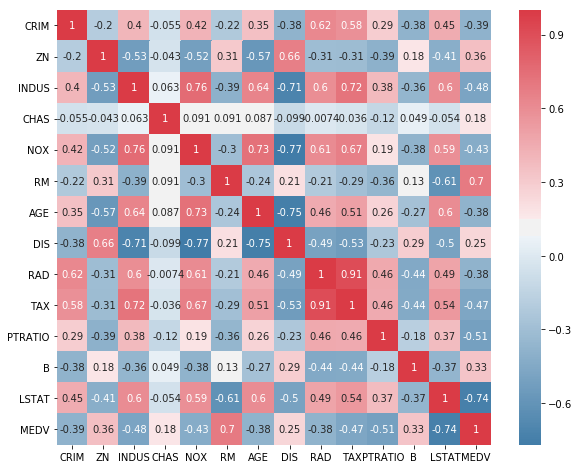

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot=True)

In [17]:
a=[]
a=data.drop(['CRIM', 'ZN','INDUS','CHAS','NOX','AGE','RAD','TAX','B','MEDV','DIS'],axis=1)
a

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
5,6.430,18.7,5.21
6,6.012,15.2,12.43
7,6.172,15.2,19.15
8,5.631,15.2,29.93
9,6.004,15.2,17.10


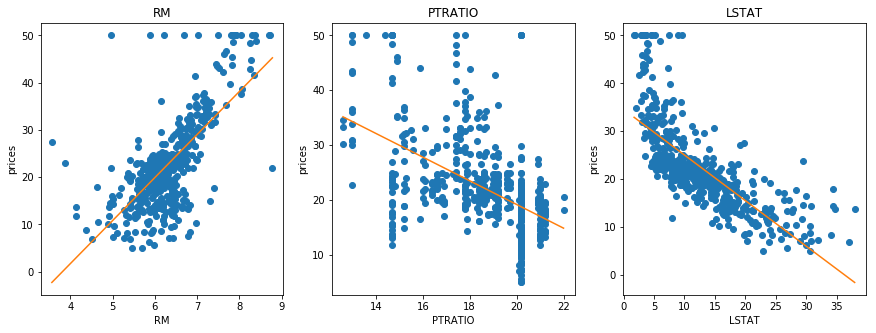

In [18]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(a.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 4, i+1)
    x = a[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [19]:
def normal_equation(x,y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)

In [20]:
features=['LSTAT','RM','PTRATIO']

In [21]:
X_b=np.c_[np.ones((len(data[features]),1)),data[features].values]

In [22]:
X_b.shape

(506, 4)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_b, y, test_size=0.2,random_state=23)
x_train.shape, y_train.shape, x_test.shape, x_train.shape

((404, 4), (404,), (102, 4), (404, 4))

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)
clf = LinearRegression()
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
expected = y_test
y_test_pred = lr.predict(x_test)

In [27]:
theta=normal_equation(x_train,y_train)
theta

array([ 20.83451586,  -0.60389974,   4.19391277,  -0.91581961])

In [28]:
new_predictions=np.dot(x_test,theta)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_predictions,y_test)

26.618094130973027

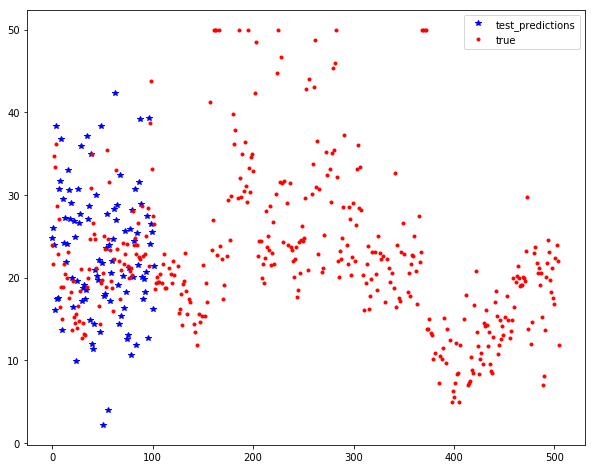

In [31]:
ax,fig=plt.subplots(figsize=(10,8))
plt.plot(new_predictions,'b.',marker='*')
plt.plot(y_train,'r.')
plt.legend(['test_predictions','true'])
plt.show()

In [33]:
# Calculate the performance of this model
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_test_pred)
print("R2 score is{}".format(r2),'\n')

R2 score is0.6909916578313646 

